# Escola de Dados - Python para inovação cívica

Os dados que usaremos nesse notebook pode ser encontrado em: [Candidatos - 2016](https://dadosabertos.tse.jus.br/dataset/candidatos-2016) e [Candidatos - 2020](https://dadosabertos.tse.jus.br/dataset/candidatos-2020-subtemas) disponível no Portal de Dados Abertos do Tribunal Superior Eleitoral.


Os dados também podem ser encontrados na pasta "Dados" deste repositório.


------
Pontos para aula:

- Quantas candidaturas para a Câmara de Vereadores houveram em cada ano agrupado por gênero ? 
- Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?
- Há correlação entre idade, gênero e custo da campanha?
- Visualização gráfica da distribuição da variável DS_COR_RACA em 2020

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [51]:
dados_ap_pa = glob.glob('base_dados/consulta*.csv')
print(dados_ap_pa)

['base_dados/consulta_cand_2016_AP.csv', 'base_dados/consulta_cand_2020_AP.csv', 'base_dados/consulta_cand_2016_PA.csv', 'base_dados/consulta_cand_2020_PA.csv']


In [52]:
lista_df = []

for dados_estado in dados_ap_pa:
    df_estado = pd.read_csv(dados_estado, sep=";", encoding='latin_1', na_values=['#NULO#'])
    lista_df.append(df_estado)

/tmp/ipykernel_67164/2630639665.py:4: DtypeWarning: Columns (31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estado = pd.read_csv(dados_estado, sep=";", encoding='latin_1', na_values=['#NULO#'])


In [53]:
lista_df[0].columns == lista_df[3].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [54]:
df_completo = pd.concat(lista_df, axis=0, ignore_index=True)

In [55]:
df_completo.shape

(48682, 71)

In [56]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48682 entries, 0 to 48681
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     48682 non-null  object 
 1   HH_GERACAO                     48682 non-null  object 
 2   ANO_ELEICAO                    48682 non-null  int64  
 3   CD_TIPO_ELEICAO                48682 non-null  int64  
 4   NM_TIPO_ELEICAO                48682 non-null  object 
 5   NR_TURNO                       48682 non-null  int64  
 6   CD_ELEICAO                     48682 non-null  int64  
 7   DS_ELEICAO                     48682 non-null  object 
 8   DT_ELEICAO                     48682 non-null  object 
 9   TP_ABRANGENCIA                 48682 non-null  object 
 10  SG_UF                          48682 non-null  object 
 11  SG_UE                          48682 non-null  int64  
 12  NM_UE                          48682 non-null 

In [57]:
df_completo['DS_CARGO'].unique()

array(['VEREADOR', 'PREFEITO', 'VICE-PREFEITO'], dtype=object)

In [58]:
df_completo['DS_DETALHE_SITUACAO_CAND'].unique()

array(['DEFERIDO', 'RENÚNCIA', 'INDEFERIDO', 'NÃO CONHECIMENTO DO PEDIDO',
       'INDEFERIDO COM RECURSO', 'DEFERIDO COM RECURSO', 'CANCELADO',
       'FALECIDO', 'PEDIDO NÃO CONHECIDO', 'CASSADO',
       'CASSADO COM RECURSO', 'PENDENTE DE JULGAMENTO',
       'PEDIDO NÃO CONHECIDO COM RECURSO'], dtype=object)

In [59]:
df_vereadores = df_completo[
    (df_completo['CD_CARGO'] == 13) &
    ((df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | 
    (df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO'))
].copy()

In [60]:
df_vereadores.shape

(42742, 71)

In [61]:
df_raca_genero = df_vereadores[['ANO_ELEICAO', 'CD_CARGO', 'SG_UF', 'NR_PARTIDO', 'SG_PARTIDO', 'CD_GENERO', 
                                'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA', 'NR_IDADE_DATA_POSSE', 
                                'VR_DESPESA_MAX_CAMPANHA']].copy()

In [62]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2016,13,AP,12,PDT,2,MASCULINO,1,BRANCA,25.0,133202.77
1,2016,13,AP,20,PSC,2,MASCULINO,3,PARDA,32.0,10803.91
2,2016,13,AP,23,PPS,2,MASCULINO,1,BRANCA,45.0,133202.77
3,2016,13,AP,25,DEM,2,MASCULINO,3,PARDA,41.0,133202.77
4,2016,13,AP,45,PSDB,4,FEMININO,3,PARDA,38.0,10803.91


# Quantas candidaturas houveram em cada ano agrupado por gênero ? 

In [63]:
df_raca_genero[['ANO_ELEICAO', 'DS_GENERO', 'CD_CARGO']].groupby(by=['ANO_ELEICAO', 'DS_GENERO']).count()

CD_CARGO
ANO_ELEICAO DS_GENERO          
2016        FEMININO       6305
            MASCULINO     13348
2020        FEMININO       8021
            MASCULINO     15068

In [64]:
df_ano_genero = df_raca_genero[['ANO_ELEICAO', 'DS_GENERO', 'CD_CARGO']].groupby(by=['ANO_ELEICAO', 'DS_GENERO'], as_index=False).count()

In [65]:
df_ano_genero

,ANO_ELEICAO,DS_GENERO,CD_CARGO
0,2016,FEMININO,6305
1,2016,MASCULINO,13348
2,2020,FEMININO,8021
3,2020,MASCULINO,15068


<AxesSubplot: xlabel='DS_GENERO'>

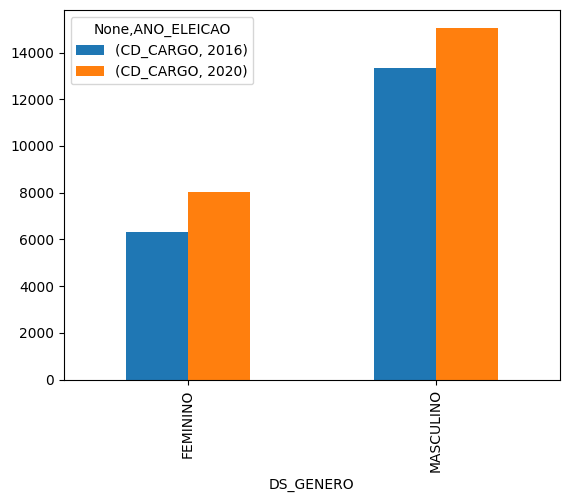

In [66]:
df_ano_genero.groupby(['ANO_ELEICAO', 'DS_GENERO']).sum().unstack(0).plot(kind="bar")

# Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?

In [67]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2016,13,AP,12,PDT,2,MASCULINO,1,BRANCA,25.0,133202.77
1,2016,13,AP,20,PSC,2,MASCULINO,3,PARDA,32.0,10803.91
2,2016,13,AP,23,PPS,2,MASCULINO,1,BRANCA,45.0,133202.77
3,2016,13,AP,25,DEM,2,MASCULINO,3,PARDA,41.0,133202.77
4,2016,13,AP,45,PSDB,4,FEMININO,3,PARDA,38.0,10803.91


In [68]:
df_raca_genero.describe()

,ANO_ELEICAO,CD_CARGO,NR_PARTIDO,CD_GENERO,CD_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
count,42742.000000,42742.0,42742.000000,42742.000000,42742.000000,42742.000000,42742.000000
mean,2018.160779,13.0,31.390646,2.670348,2.578330,42.791540,54508.850652
std,1.993550,0.0,20.483877,0.944113,0.848221,10.848362,86728.097359
min,2016.000000,13.0,10.000000,2.000000,1.000000,18.000000,10803.910000
25%,2016.000000,13.0,15.000000,2.000000,2.000000,35.000000,13417.590000
50%,2020.000000,13.0,23.000000,2.000000,3.000000,42.000000,22378.500000
75%,2020.000000,13.0,45.000000,4.000000,3.000000,50.000000,49644.560000
max,2020.000000,13.0,90.000000,4.000000,6.000000,91.000000,438043.030000


In [69]:
cortes = [18, 24, 34, 44, 54, 64, 100]
categorias = ['18 a 24 anos', '25 a 34 anos', '35 a 44 anos', '45 a 54 anos', '55 a 64 anos', 'acima de 64 anos']

In [70]:
df_raca_genero['FAIXA_ETARIA'] = pd.cut(df_raca_genero['NR_IDADE_DATA_POSSE'], cortes, labels=categorias, include_lowest=True)

In [71]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA,FAIXA_ETARIA
0,2016,13,AP,12,PDT,2,MASCULINO,1,BRANCA,25.0,133202.77,18 a 24 anos
1,2016,13,AP,20,PSC,2,MASCULINO,3,PARDA,32.0,10803.91,25 a 34 anos
2,2016,13,AP,23,PPS,2,MASCULINO,1,BRANCA,45.0,133202.77,35 a 44 anos
3,2016,13,AP,25,DEM,2,MASCULINO,3,PARDA,41.0,133202.77,35 a 44 anos
4,2016,13,AP,45,PSDB,4,FEMININO,3,PARDA,38.0,10803.91,35 a 44 anos


In [72]:
df_raca_genero['FAIXA_ETARIA'].mode()

0    35 a 44 anos
Name: FAIXA_ETARIA, dtype: category
Categories (6, object): ['18 a 24 anos' < '25 a 34 anos' < '35 a 44 anos' < '45 a 54 anos' < '55 a 64 anos' < 'acima de 64 anos']

# Visualize graficamente a distribuição da variável DS_COR_RACA em 2016

In [73]:
df_raca_2016 = df_raca_genero[df_raca_genero['ANO_ELEICAO'] == 2016].copy()

In [74]:
df_raca_2016[['CD_COR_RACA', 'DS_COR_RACA']].groupby(['DS_COR_RACA']).count()

,CD_COR_RACA
DS_COR_RACA,
AMARELA,81
BRANCA,3520
INDÍGENA,63
PARDA,14141
PRETA,1848


In [75]:
raca = df_raca_2016['DS_COR_RACA'].unique().tolist()
print(raca)

['BRANCA', 'PARDA', 'PRETA', 'INDÍGENA', 'AMARELA']


In [76]:
frequencia = df_raca_2016['DS_COR_RACA'].value_counts().tolist()
print(frequencia)

[14141, 3520, 1848, 81, 63]


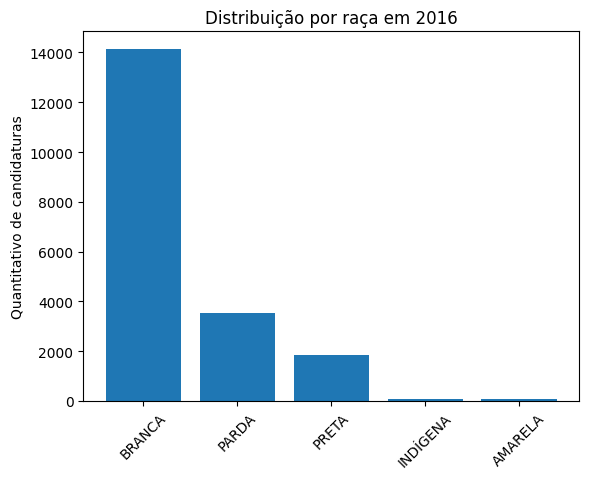

In [77]:
plt.bar(raca, frequencia)

plt.xticks(rotation=45) 
plt.title('Distribuição por raça em 2016')
plt.ylabel('Quantitativo de candidaturas')

plt.savefig('distribuicao_raca_2016.pdf')

# Há correlação entre idade, gênero e custo da campanha?

In [78]:
df_raca_genero[['NR_IDADE_DATA_POSSE', 'CD_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].corr(method='pearson')

,NR_IDADE_DATA_POSSE,CD_GENERO,VR_DESPESA_MAX_CAMPANHA
NR_IDADE_DATA_POSSE,1.000000,-0.091149,0.071978
CD_GENERO,-0.091149,1.000000,-0.014853
VR_DESPESA_MAX_CAMPANHA,0.071978,-0.014853,1.000000
